# Poblem Statement: 
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
import warnings
warnings.filterwarnings('ignore')

# Importing Of Data

In [2]:
data=pd.read_csv(r'C:\Users\Jagadish Redd\Anaconda\Downloads\Loan data.csv')

In [3]:
#reading of imported data

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#checking the shape of entire data
data.shape

(614, 13)

In [5]:
#geting the summary of data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Total columns are in data
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#information of enter data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#Finding the Null Values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Here we can see that Some Columns haivng Null Values

# 

# Dealing with Missing Values for entire data

Checking Missing values for columns

# 

Gender Column is having 13 Null Values

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

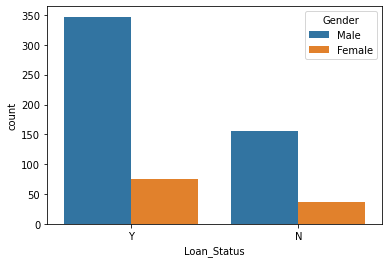

In [111]:
sns.countplot('Loan_Status',hue='Gender',data=data)

In [112]:
#filling the missing values for Gender
#By analysing the graph most of the Gender is male so, we are going to fill Gender column with male.

data['Gender']=data['Gender'].fillna('Male')

Married column is having 3 Null values

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

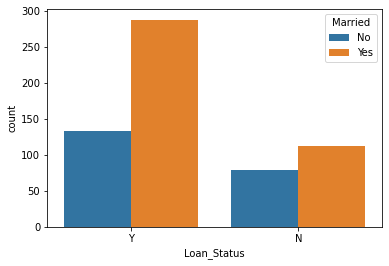

In [113]:
sns.countplot('Loan_Status',hue='Married',data=data)

In [114]:
#filling the missing values for Married
#Most of the people are married will get the loan so, we are going to fill Nul values with Yes

data['Married']=data['Married'].fillna('Yes')

Dependents column having 15 Null vlues

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

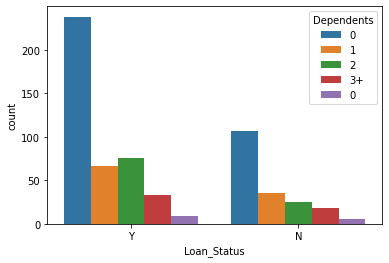

In [117]:
sns.countplot('Loan_Status',hue='Dependents',data=data)

In [14]:
#We can see most of the dependents are 0 so we are going to fill with 0
data['Dependents']=data['Dependents'].fillna(0)

Self_Employed colum is having 32 Null values

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

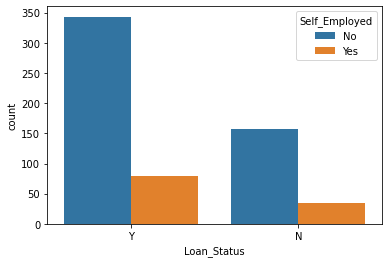

In [100]:
sns.countplot(x='Loan_Status',hue='Self_Employed',data=data)

In [118]:
#filling of the data
#Most of the people are not self employed so,we are going to fill that column with No
data['Self_Employed']=data['Self_Employed'].fillna('No')

LoanAmount column is having 22 NUll values

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

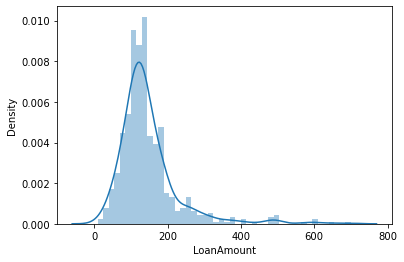

In [106]:
sns.distplot(data['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

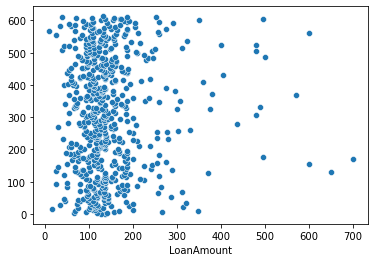

In [107]:
sns.scatterplot(data['LoanAmount'],y=np.arange(0,614))

Here it looks like outliers are totally right skewed, we are not going to fill the values by mean of this data,we are going to take the mean which does not contain outliers.

In [120]:
meandata=data[data['LoanAmount']<=400]['LoanAmount'].mean()
data['LoanAmount'].fillna(meandata,inplace=True)

LoanAmount_Term column is haivng 14 null values

<AxesSubplot:xlabel='Loan_Amount_Term'>

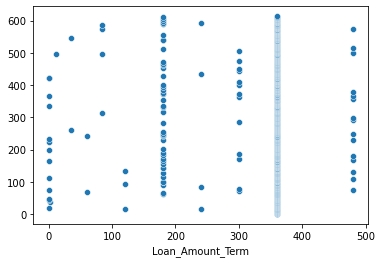

In [122]:
sns.scatterplot(data['Loan_Amount_Term'],y=np.arange(0,614))

In [124]:
#To fill the Loan_Amount_Term missing values we will use Mode 

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].value_counts().idxmax(),inplace=True)

Credit_History is having 50 Null values

<AxesSubplot:xlabel='Credit_History'>

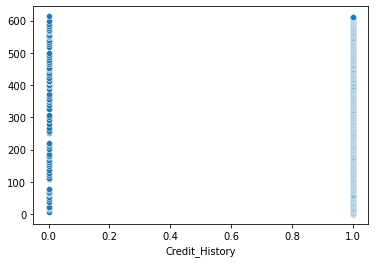

In [108]:
sns.scatterplot(data['Credit_History'],y=np.arange(0,614))

In [25]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

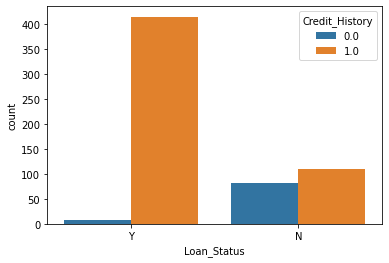

In [109]:
sns.countplot('Loan_Status',hue='Credit_History',data=data)

In [127]:
#To fill the Credit_History missing values we will use Mode 
data['Credit_History'].fillna(data['Credit_History'].value_counts().idxmax(),inplace=True)

# 

# Again Checking of Null Values in the Data 

In [128]:
#checking of info
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here there is no null values recorded

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Implementing Label Encoder to convert Labels into Numeric.

In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder
df=data.copy()

checking for duplicates of data

In [153]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())


[1 0]
[0 1]
[0 1]
[0 1]
[2 0 1]
[1 0]


In [154]:
df['Gender']=le().fit_transform(df['Gender'])
df['Married']=le().fit_transform(df['Married'])
df['Education']=le().fit_transform(df['Education'])
df['Self_Employed']=le().fit_transform(df['Self_Employed'])
df['Property_Area']=le().fit_transform(df['Property_Area'])
df['Loan_Status'] = le().fit_transform(df['Loan_Status'])

In [155]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[2 0 1]
[1 0]


In [136]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,137.186851,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,137.186851,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Now the data completly turn into Numeric so, we can start Implementing in models.

In [38]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# 

# By using Sklearn checking Train_Test_Split

In [156]:
x=df.drop(['Loan_ID','Dependents','Loan_Status'],axis=1)
y=df[['Loan_Status']]

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

Under going with Standardisation Process

Because our data is Big

In [158]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [159]:
std.fit(x_train)

StandardScaler()

In [161]:
xtr=std.transform(x_train)

In [162]:
xtr

array([[ 0.36004115,  0.67259271, -0.55841558, ...,  0.3520489 ,
         0.38851434,  1.13781838],
       [ 0.36004115, -1.48678388, -0.55841558, ...,  0.3520489 ,
        -2.57390754,  1.13781838],
       [ 0.36004115,  0.67259271, -0.55841558, ...,  0.3520489 ,
         0.38851434, -0.11275678],
       ...,
       [-2.7774603 , -1.48678388, -0.55841558, ...,  0.3520489 ,
         0.38851434,  1.13781838],
       [-2.7774603 ,  0.67259271, -0.55841558, ..., -1.3591051 ,
         0.38851434, -0.11275678],
       [ 0.36004115,  0.67259271, -0.55841558, ...,  0.3520489 ,
         0.38851434,  1.13781838]])

# Training our Models On Training Data

Checking with Logistic Regression model

In [49]:
from sklearn.linear_model import LogisticRegression

lreg=LogisticRegression()

In [163]:
lreg.fit(xtr,y_train)

LogisticRegression()

In [164]:
lreg.coef_

array([[-0.19482138,  0.69974413, -0.00424631,  0.27733593,  0.24401393,
         0.32226358, -0.24762153,  0.15679609,  1.37818022,  0.29969011]])

In [165]:
lreg.intercept_

array([1.00078322])

# 

Predicting on Test Values

Tranforming testing features into standard forms

In [179]:
xts=std.transform(x_test)

Predicting on Transformed Testing Features

In [180]:
y_pred=lreg.predict(xts)

In [181]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 0]


# Getting tht accuracy Report

In [182]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [183]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.45      0.58       156
           1       0.79      0.95      0.86       336

    accuracy                           0.79       492
   macro avg       0.80      0.70      0.72       492
weighted avg       0.79      0.79      0.77       492



In Logistic Regression we are getting 80% accuracy.It makes one best fit.

# 

# Checking with DecisionTree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [58]:
dt = DecisionTreeClassifier()

In [59]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
y_predict = dt.predict(x_test)

In [61]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.56      0.49      0.52       156
           1       0.78      0.82      0.80       336

    accuracy                           0.72       492
   macro avg       0.67      0.66      0.66       492
weighted avg       0.71      0.72      0.71       492



In [85]:
accuracy_score(y_test,y_predict)*100

71.54471544715447

# 

# Checking with XGBoost Classifier

In [63]:
import xgboost as xgb

In [64]:
from xgboost.sklearn import XGBClassifier

In [87]:
xgb=XGBClassifier(n_estimators=50)

In [88]:
xgb

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [89]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
xgb.score(x_test,y_test)*100

74.1869918699187

In Xgboost we are getting 74% accuracy

# 

# Checking with AdaBoostClassifier model

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
ada=AdaBoostClassifier()

In [71]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [72]:
ada.score(x_test,y_test)*100

73.78048780487805

In AdaBoost we are getting 73% accuracy.

# 

# Checking with SVM model

In [73]:
from sklearn.svm import SVC

In [74]:
svm=SVC()

In [75]:
svm.fit(x_train,y_train)

SVC()

In [76]:
svm.score(x_test,y_test)*100

68.29268292682927

In SVM we are getting 68% of accuracy.

# 

# Checking with Random Forest model

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
RFC=RandomForestClassifier(n_estimators=20)

In [79]:
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [80]:
RFC.score(x_test,y_test)*100

78.45528455284553

In RandomForestClassifier we are getting 78% of accuracy.

# 

# Checking with KNNeighbors model

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn=KNeighborsClassifier()

In [83]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [84]:
knn.score(x_test,y_test)*100

65.04065040650406

# 

In all of the above models we used Logistic Regression is giving Good Accuracy as 80%.

So, that we can come to conclussion their is 80% less chances of customers are being defualt and remaining 20% can become into default list.